In [3]:
#Importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#Loading the dataset into a dataframe
vg_data=pd.read_csv("vgsales.csv")
vg_data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
#Checking the number of rows and columns
vg_data.shape

(16598, 11)

In [9]:
#Checking for the null values
vg_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
#Dropping NA values
vg_data = vg_data.dropna(subset=['Publisher', 'Year'], axis=0)
vg_data = vg_data.reset_index(drop=True)
vg_data.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
#Checking for the datatype for each column
vg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
#Converting the year column from 'float' to 'int'
vg_data['Year'] = vg_data['Year'].astype(int)
vg_data['Year'].dtype

dtype('int32')

In [21]:
#checking the number of games per genre 
vg_data['Genre'].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

In [70]:
#EDA

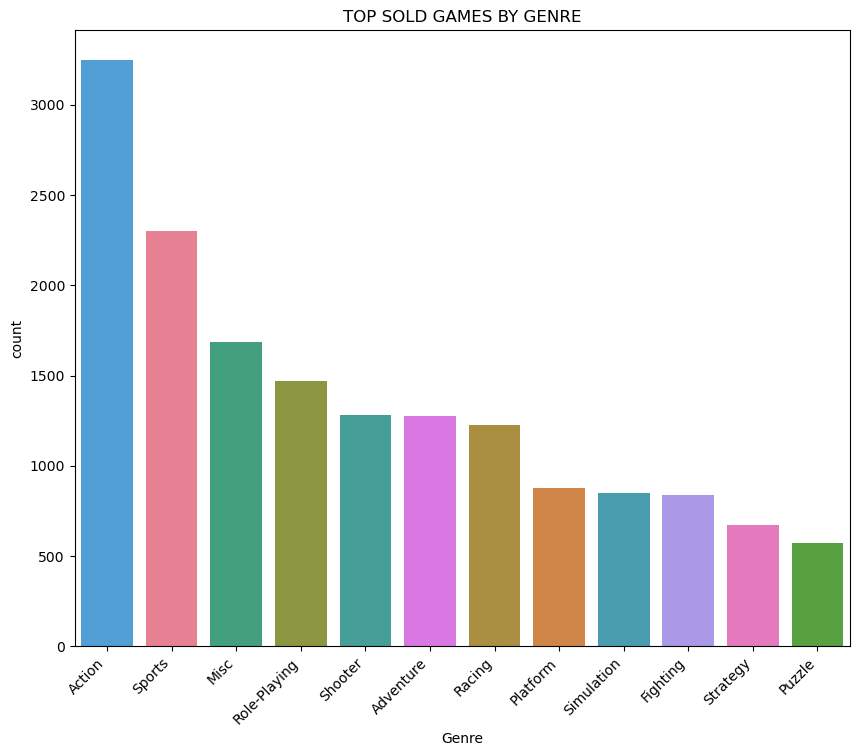

In [23]:
#Bar plot for top sold games per genre
plt.figure(figsize=(10,8))
plt.title('TOP SOLD GAMES BY GENRE')
sns.countplot(data=vg_data, hue='Genre',x='Genre', order=vg_data['Genre'].value_counts().index)
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right
plt.show()

In [25]:
#Checking the number of games per platform
vg_data["Platform"].value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

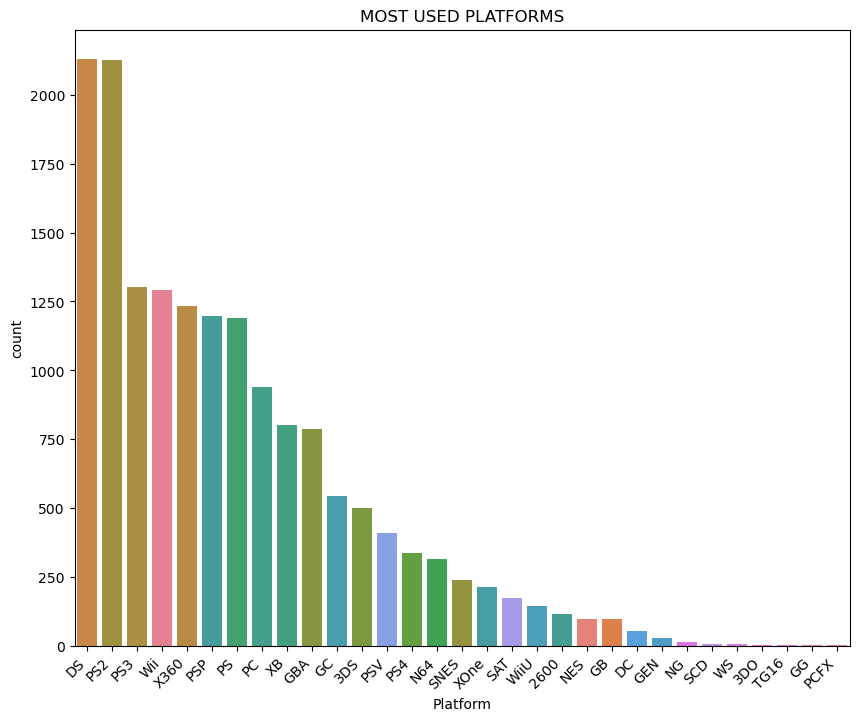

In [27]:
#Bar plot for top gaming platforms 
plt.figure(figsize=(10,8))
plt.title('MOST USED PLATFORMS')
sns.countplot(data=vg_data, x = 'Platform',hue='Platform', order = vg_data['Platform'].value_counts().index)
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right
plt.show()

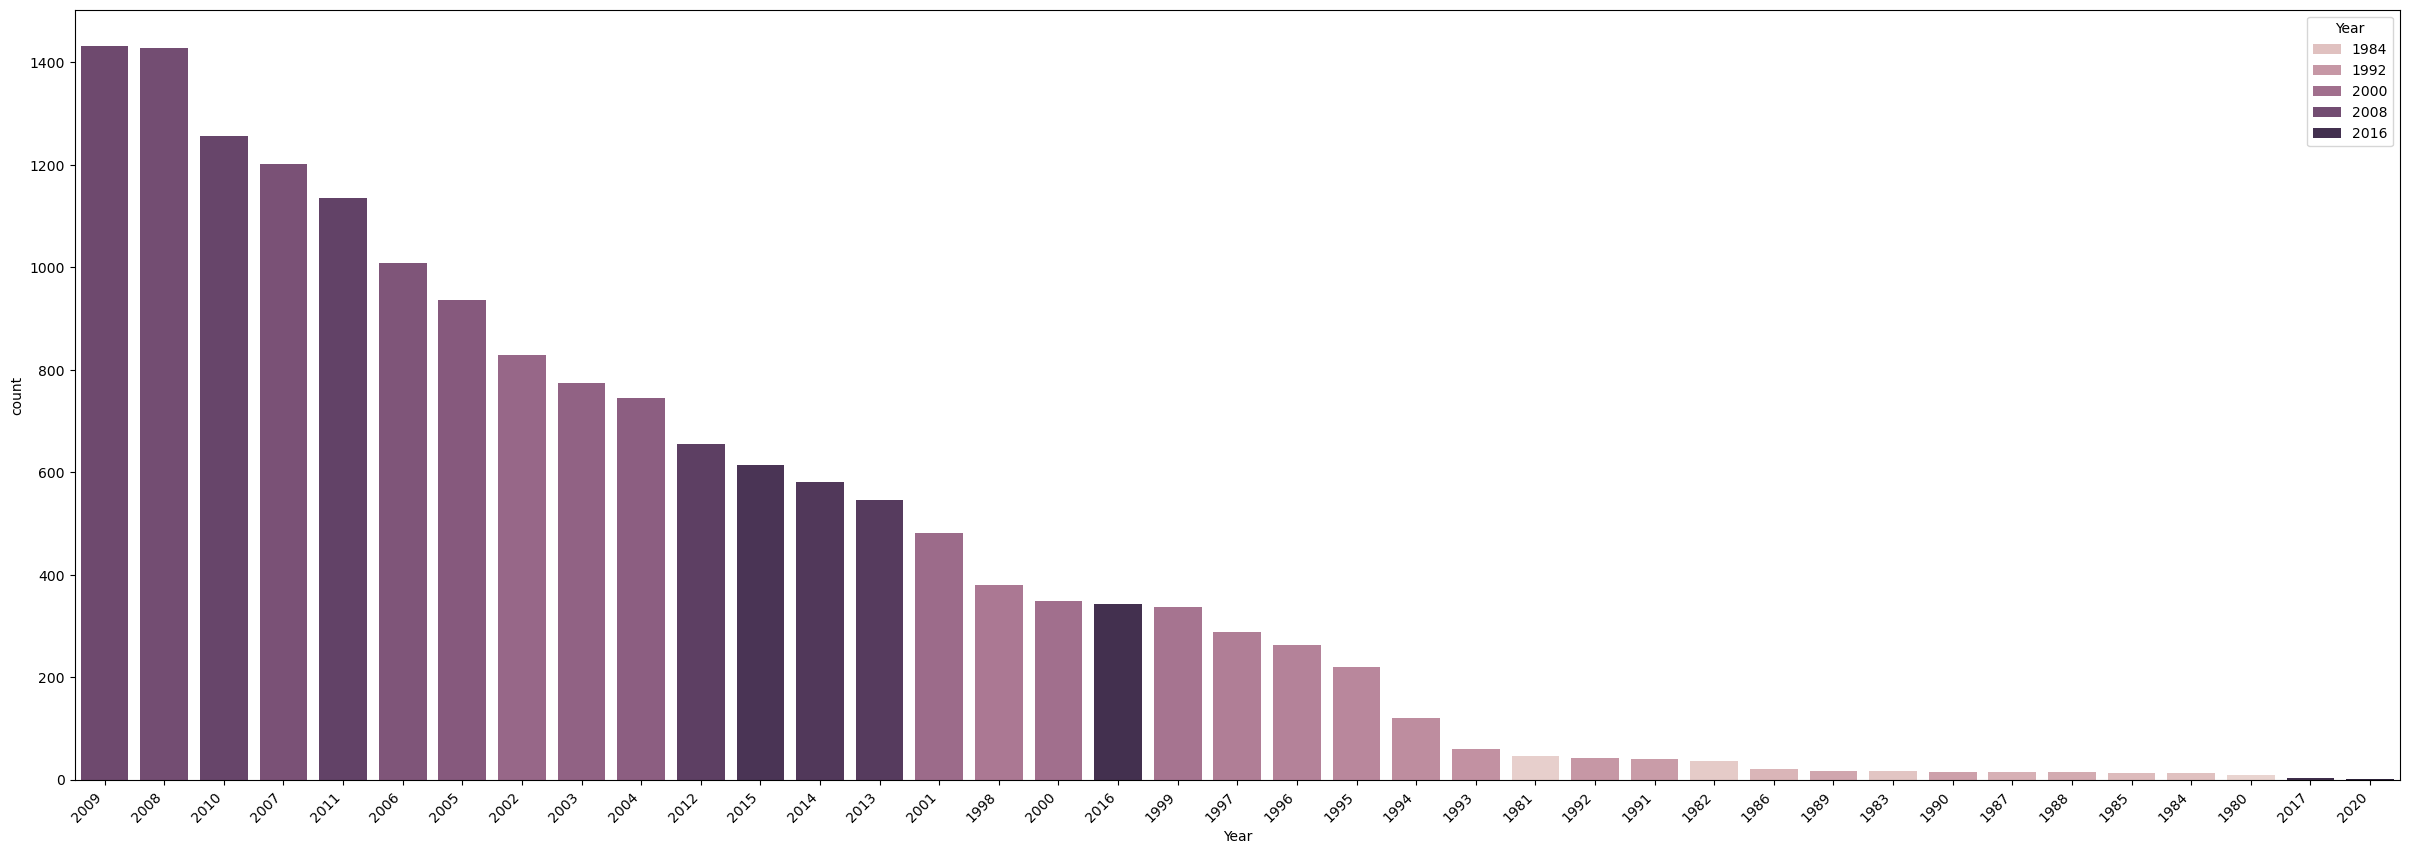

In [29]:
#Bar plot for total global sales per year
plt.figure(figsize=(30,10))
sns.countplot(data=vg_data, x = 'Year',hue='Year', order = vg_data['Year'].value_counts().index)
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right
plt.show()

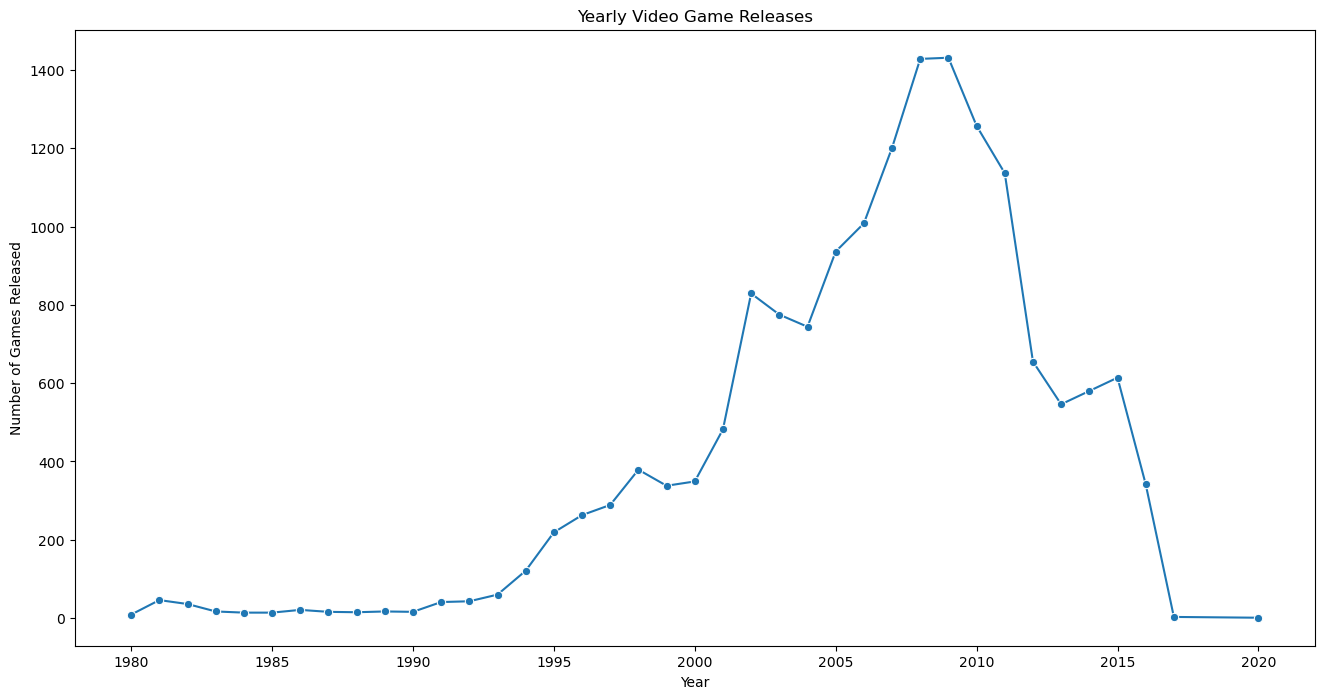

In [31]:
#Checking the number of games released per year and plotting a line chart for it
year_counts = vg_data['Year'].value_counts().sort_index() 
year_counts = year_counts.reset_index()  
year_counts.columns = ['Year', 'Count'] 


plt.figure(figsize=(16, 8))
sns.lineplot(data=year_counts, x='Year', y='Count', marker='o')
plt.title("Yearly Video Game Releases")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.show()

C:\Users\Mriganko Saha\AppData\Local\Temp\ipykernel_50632\15281441.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_sales, x='Global_Sales', y='Genre', palette='viridis')


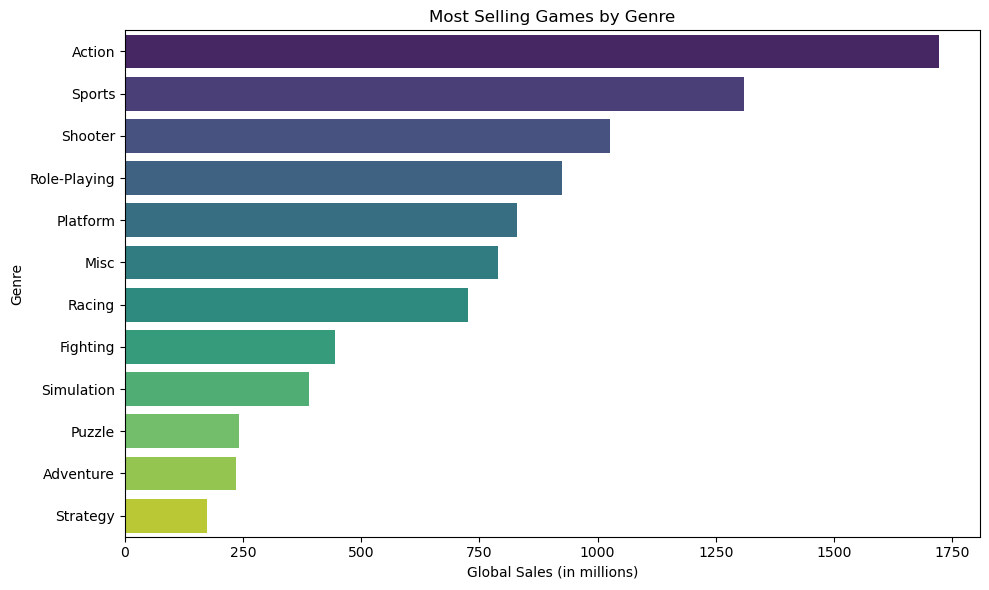

In [33]:
#An alternative plot(horizontal bar chart) for top selling games by genre
genre_sales = vg_data.groupby('Genre')['Global_Sales'].sum().reset_index()

# Sort by Global Sales in descending order
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)

# Plot the data
plt.figure(figsize=(10,6))
sns.barplot(data=genre_sales, x='Global_Sales', y='Genre', palette='viridis')

# Add labels and title
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Genre')
plt.title('Most Selling Games by Genre')

# Show the plot
plt.tight_layout()
plt.show()

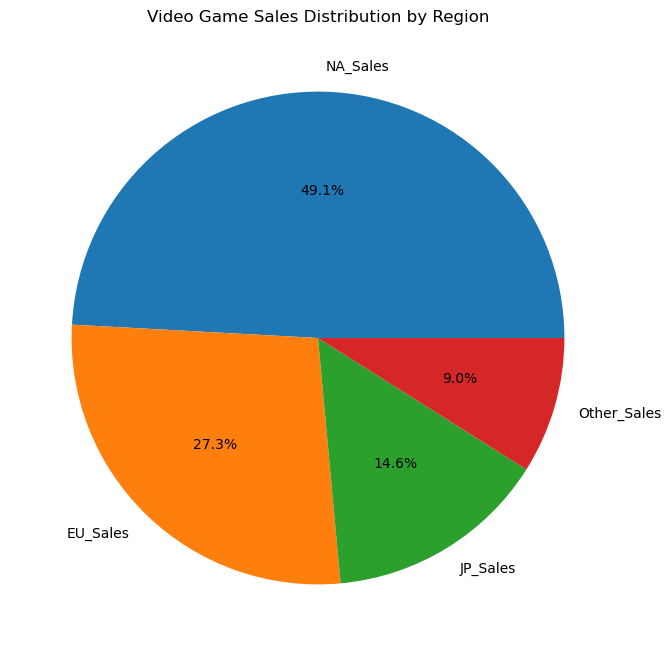

In [35]:
#Calculating sales for each geographical regions provided
region_sales = vg_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

#Plotting a pie chart to visualize the video game sales by region
plt.figure(figsize=(10, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%')
plt.title('Video Game Sales Distribution by Region')
plt.show()

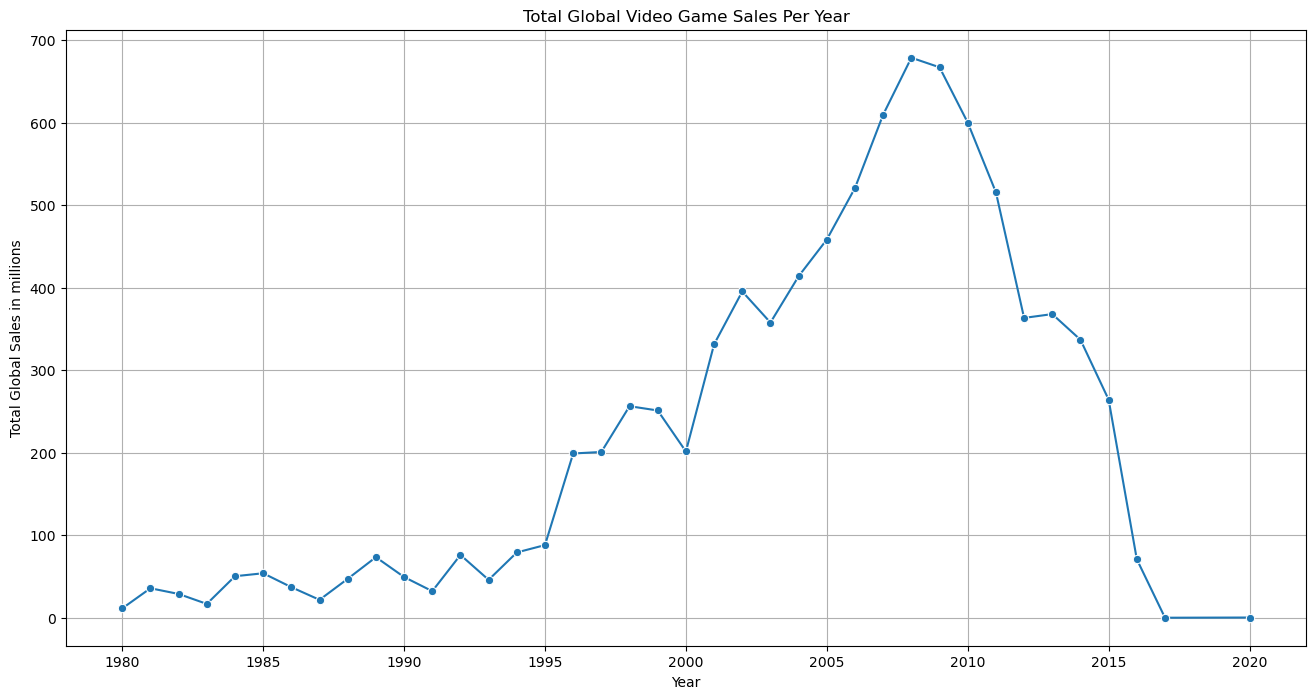

In [37]:
#Calculating Plotting the total global sales for each year
global_sales_per_year = vg_data.groupby('Year')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(data=global_sales_per_year, x='Year', y='Global_Sales', marker='o')
plt.title('Total Global Video Game Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Total Global Sales in millions')
plt.grid(True)
plt.show()

In [39]:
#Using the Augmented Dickey Fuller test to check stationarity
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(vg_data['Global_Sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("The data is stationary (reject null hypothesis).")
else:
    print("The data is non-stationary (fail to reject null hypothesis).")

ADF Statistic: -12.806280740153829
p-value: 6.590334379942282e-24
Critical Values: {'1%': -3.430752556378179, '5%': -2.8617179135073334, '10%': -2.5668646988917003}
The data is stationary (reject null hypothesis).


In [41]:
#ARIMA(AutoRegressive Integrated Moving Average) model

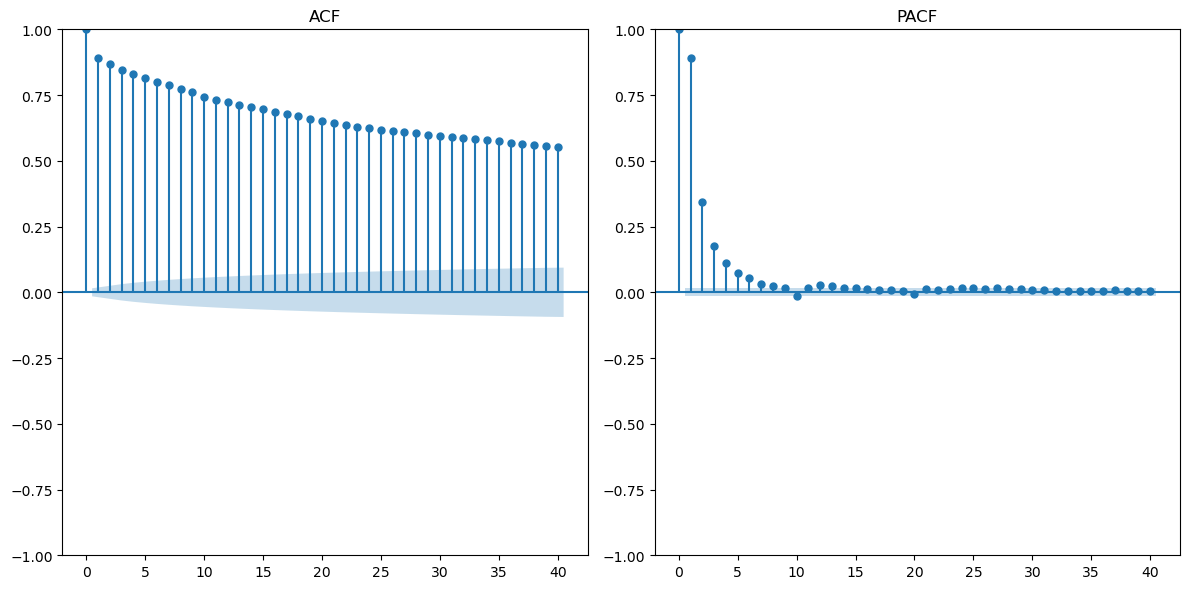

In [43]:
#Plotting the Auto Correlation Function(ACF) and Partial Auto Correlation Function(PACF) to find p,d,q values for the ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(vg_data["Global_Sales"], lags=40, ax=plt.gca())
plt.title("ACF")

plt.subplot(122)
plot_pacf(vg_data["Global_Sales"], lags=40, ax=plt.gca())
plt.title("PACF")

plt.tight_layout()
plt.show()

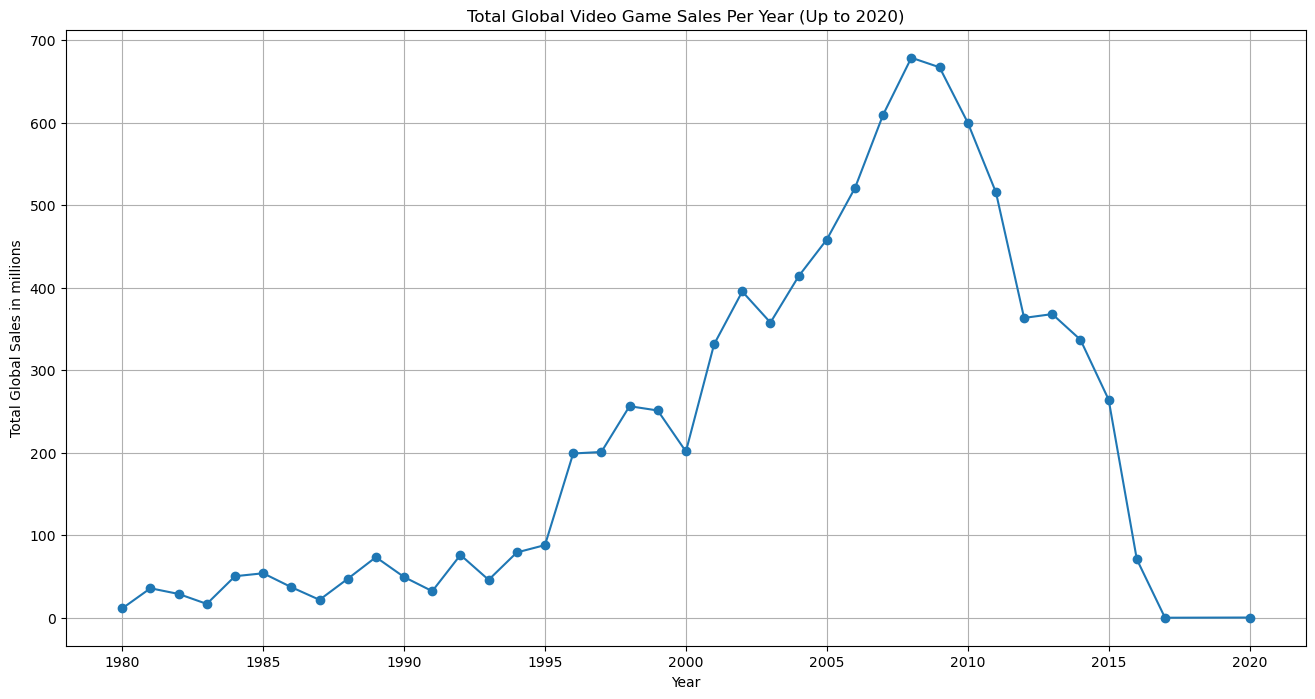

D:\Coderboimolly\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Coderboimolly\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Coderboimolly\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Coderboimolly\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Coderboimolly\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parame

                               SARIMAX Results                                
Dep. Variable:           Global_Sales   No. Observations:                   39
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -208.332
Date:                Sat, 30 Nov 2024   AIC                            426.663
Time:                        15:16:06   BIC                            434.851
Sample:                             0   HQIC                           429.577
                                 - 39                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5152      1.518      0.339      0.734      -2.460       3.490
ar.L2          0.2248      1.054      0.213      0.831      -1.841       2.290
ma.L1         -0.1727      1.475     -0.117      0.9

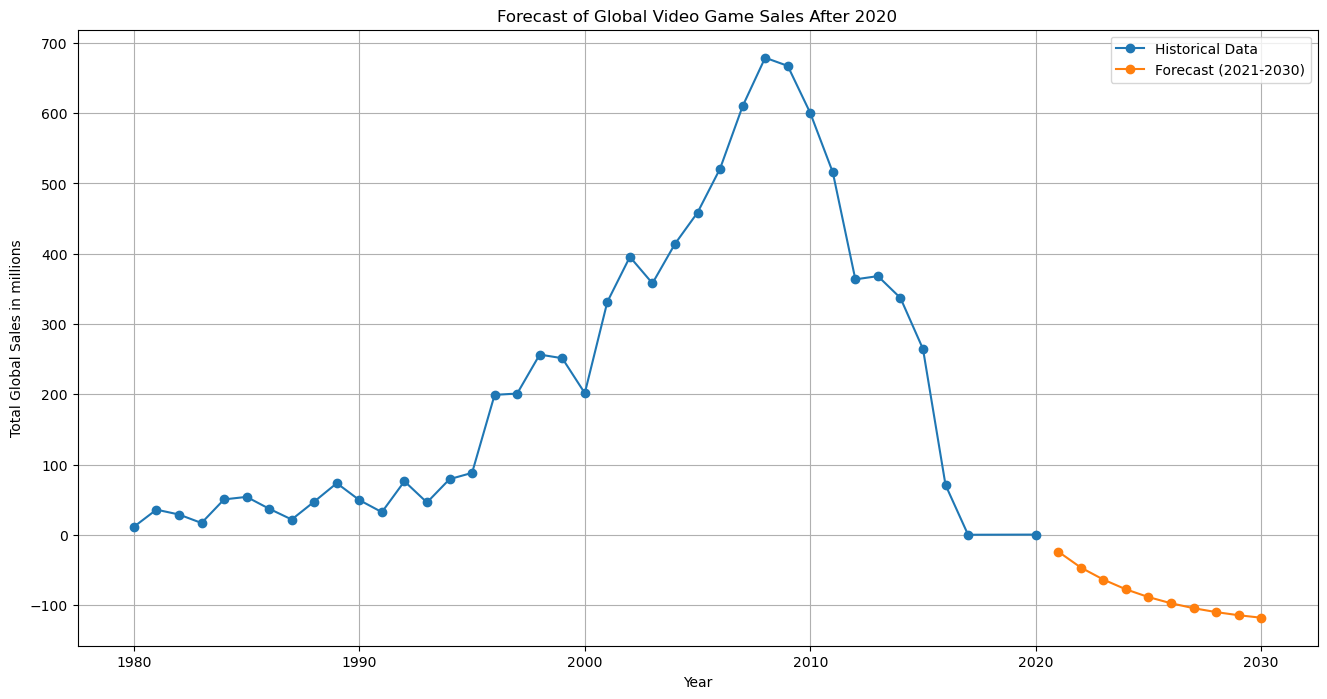

      Forecasted_Global_Sales
Year                         
2021               -23.971049
2022               -46.600069
2023               -63.711645
2024               -77.613965
2025               -88.622655
2026               -97.419205
2027              -104.425647
2028              -110.012595
2029              -114.465852
2030              -118.015966


In [45]:
#Implementing the ARIMA model using the whole dataset as our training data (till 2020) and forecasting from 2021-2030

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Filter data for years up to 2020
global_sales_per_year = vg_data.groupby('Year')['Global_Sales'].sum().reset_index()
global_sales_per_year = global_sales_per_year[global_sales_per_year['Year'] <= 2020]

# Ensure 'Year' is sorted
global_sales_per_year = global_sales_per_year.sort_values(by='Year')

# Setting 'Year' as the index
global_sales_per_year.set_index('Year', inplace=True)

# Visualizing the time series data
plt.figure(figsize=(16, 8))
plt.plot(global_sales_per_year, marker='o')
plt.title('Total Global Video Game Sales Per Year (Up to 2020)')
plt.xlabel('Year')
plt.ylabel('Total Global Sales in millions')
plt.grid(True)
plt.show()

# Train the model on data up to 2020
train = global_sales_per_year

# Fitting the ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # Adjust order based on data analysis
model_fit = model.fit()

print(model_fit.summary())

# Forecasting for the years after 2020
future_years = np.arange(2021, 2031)  # Forecasting up to 2030
forecast = model_fit.forecast(steps=len(future_years))

# Create a DataFrame for the forecasted years
forecast_df = pd.DataFrame({
    'Year': future_years,
    'Forecasted_Global_Sales': forecast
})
forecast_df.set_index('Year', inplace=True)

# Combine the original data and forecast using pd.concat
combined_df = pd.concat([global_sales_per_year, forecast_df], axis=0)

# Plot the combined data
plt.figure(figsize=(16, 8))
plt.plot(global_sales_per_year, label='Historical Data', marker='o')
plt.plot(forecast_df, label='Forecast (2021-2030)', marker='o')
plt.title('Forecast of Global Video Game Sales After 2020')
plt.xlabel('Year')
plt.ylabel('Total Global Sales in millions')
plt.legend()
plt.grid(True)
plt.show()

# Display forecast results
print(forecast_df)

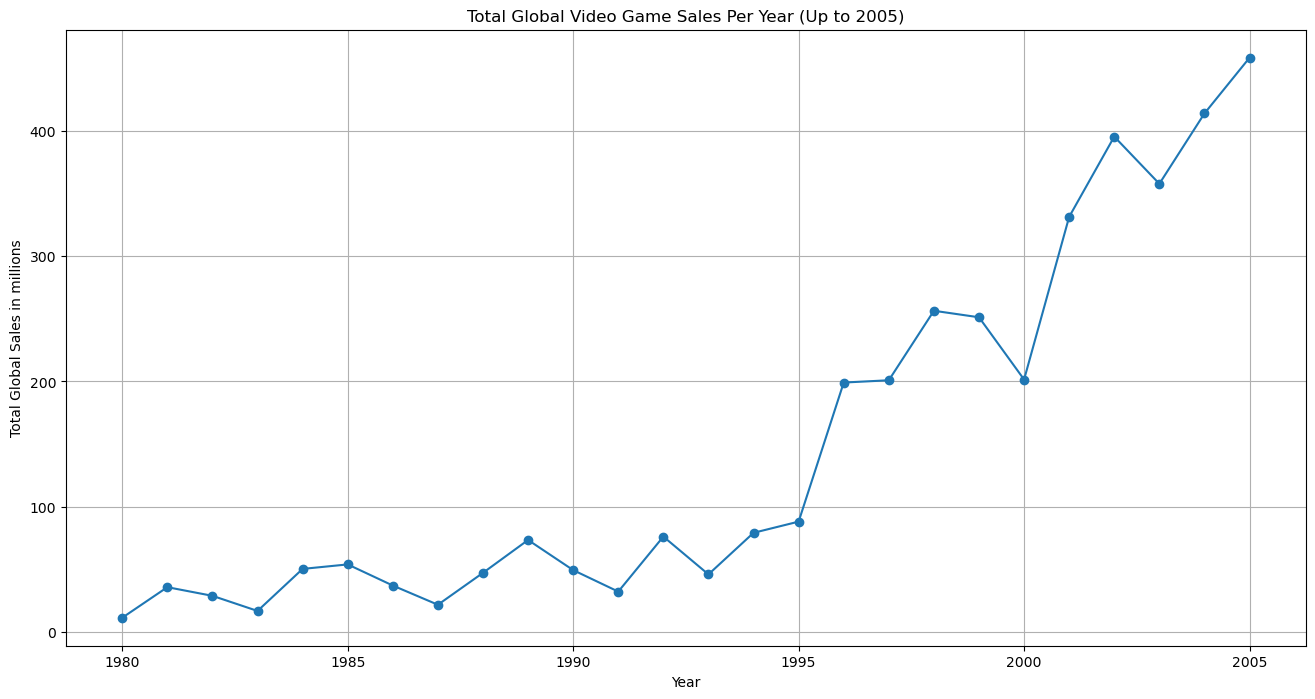

D:\Coderboimolly\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Coderboimolly\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Coderboimolly\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Coderboimolly\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Coderboimolly\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parame

                               SARIMAX Results                                
Dep. Variable:           Global_Sales   No. Observations:                   26
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -130.360
Date:                Sat, 30 Nov 2024   AIC                            270.720
Time:                        15:18:47   BIC                            276.815
Sample:                             0   HQIC                           272.411
                                 - 26                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6058      0.530     -1.143      0.253      -1.645       0.433
ar.L2         -0.9683      0.366     -2.645      0.008      -1.686      -0.251
ma.L1          0.5027      1.165      0.431      0.6

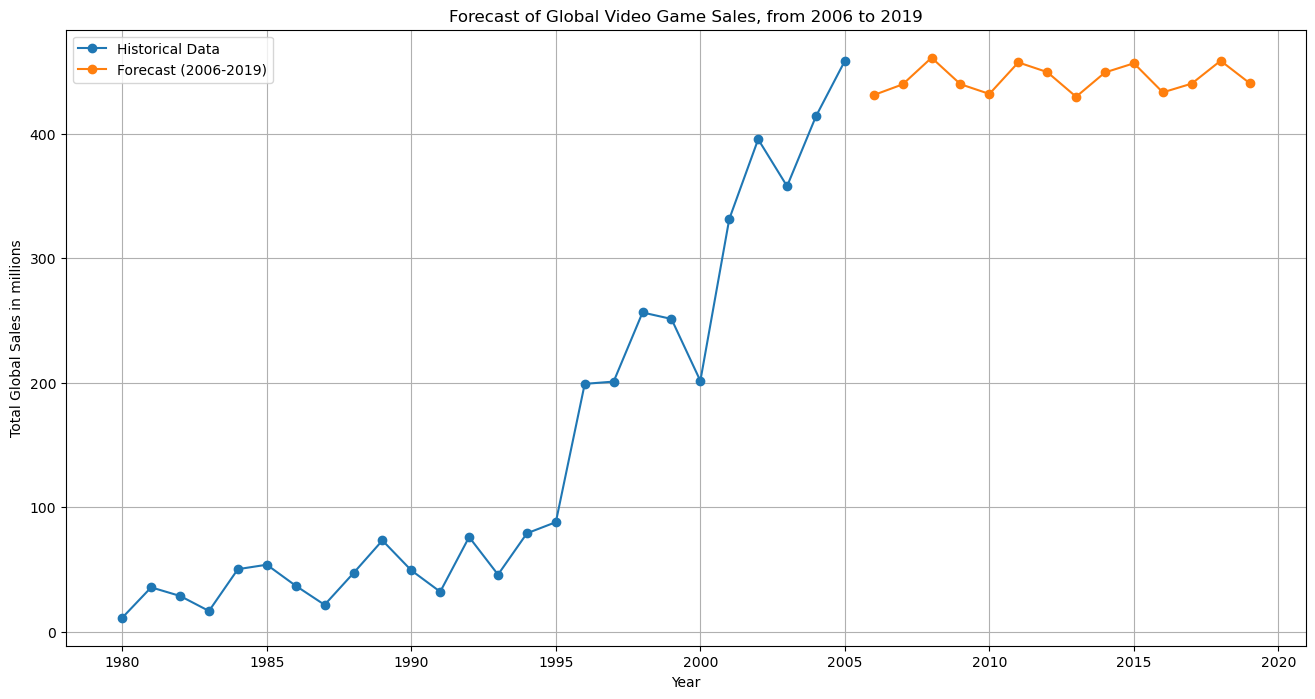

      Forecasted_Global_Sales
Year                         
2006               431.061225
2007               439.643554
2008               461.023570
2009               439.761106
2010               431.939221
2011               457.266591
2012               449.497345
2013               429.678961
2014               449.208063
2015               456.567860
2016               433.198873
2017               440.229179
2018               458.598872
2019               440.662917


In [47]:
#Implementing the ARIMA model again keeping our training data till 2005 and forecasting from 2006-2019
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Filter data for years up to 2020
global_sales_per_year = vg_data.groupby('Year')['Global_Sales'].sum().reset_index()
global_sales_per_year = global_sales_per_year[global_sales_per_year['Year'] <= 2005]

# Ensure 'Year' is sorted
global_sales_per_year = global_sales_per_year.sort_values(by='Year')

# Setting 'Year' as the index
global_sales_per_year.set_index('Year', inplace=True)

# Visualizing the time series data
plt.figure(figsize=(16, 8))
plt.plot(global_sales_per_year, marker='o')
plt.title('Total Global Video Game Sales Per Year (Up to 2005)')
plt.xlabel('Year')
plt.ylabel('Total Global Sales in millions')
plt.grid(True)
plt.show()

# Train the model on data up to 2020
train = global_sales_per_year

# Fitting the ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # Adjust order based on data analysis
model_fit = model.fit()
print(model_fit.summary())

# Forecasting for the years after 2020
future_years = np.arange(2006, 2020)  # Forecasting up to 2030
forecast = model_fit.forecast(steps=len(future_years))

# Create a DataFrame for the forecasted years
forecast_df = pd.DataFrame({
    'Year': future_years,
    'Forecasted_Global_Sales': forecast
})
forecast_df.set_index('Year', inplace=True)

# Combine the original data and forecast using pd.concat
combined_df = pd.concat([global_sales_per_year, forecast_df], axis=0)

# Plot the combined data
plt.figure(figsize=(16, 8))
plt.plot(global_sales_per_year, label='Historical Data', marker='o')
plt.plot(forecast_df, label='Forecast (2006-2019)', marker='o')
plt.title('Forecast of Global Video Game Sales, from 2006 to 2019')
plt.xlabel('Year')
plt.ylabel('Total Global Sales in millions')
plt.legend()
plt.grid(True)
plt.show()

# Display forecast results
print(forecast_df)